Assignment 3.2: Preparing for Exploratory Data Analysis Using Python 
<br> Name: Michael Hotaling
<br> Date: 2020-09-15


## Exercise 2-1
### Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late. <br> <br>Which summary statistic would you use if you wanted to get a story on the evening news? WHihc ones would you use if you wanted to reassure an anxious patient?

It's fairly obvious after analyzing the data that first babies are not typically born late. A Cohen Efficient of 0.2 typically shows a weak correlation and the ration we achieved was 10 times less than that. (McLeod 2019)

Like the book mentions, the average different between first babies and other babies works out to be around 13 hours, which is most likely due to statistical noise. 

If we wanted to get our story on the evening news (regardless of scientific integrity) we could argue that, since there is a slight increase in pregnancy time for first children, there is a hogher chance of that child being born late. 

From a professional point of view, if an expecting mother is concerned about a pregnancy lasting too long, it would be wise of the doctor assure the patient that there is really no significance between first babies and other babies. 



McLeod, S. A. (2019, July 10). *What does effect size tell you?* Simply psychology: https://www.simplypsychology.org/effect-size.html


### Finally, imagine that you are Cecil Adams, author of [*The Straight Dope*](http://straightdope.com/) and your job is to answer the question, "Do first babies arrive late?" Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

Dear Mike:

I've heard a lot of rumors about first pregnancies lasting a lot longer than subsequent pregnancies. As a mother-to-be, I was wondering of this old wives tail holds any water. What do you think? Is there any evidence for this?

Regards,
An Expecting Mother 

Mike replies:

No need to worry, EM. Using data from the National Survey of Family Growth, we can analyze the pregnancy durations of over 13,000 pregnancies to get that answer. First, we will import our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nsfg

In [2]:
preg = nsfg.ReadFemPreg()
preg = preg[preg['outcome'] == 1]

This data set comes with lots of different information, and one of our data attributes is PRGLNGTH, or pregnancy length. We can check out the average duration for each pregnancy using that attribute

(32, 33]      49
(33, 34]      60
(34, 35]     311
(35, 36]     321
(36, 37]     455
(37, 38]     607
(38, 39]    4693
(39, 40]    1116
(40, 41]     587
(41, 42]     328
(42, 43]     148
(43, 44]      46
(44, 45]      10
(45, 46]       1
Name: prglngth, dtype: int64


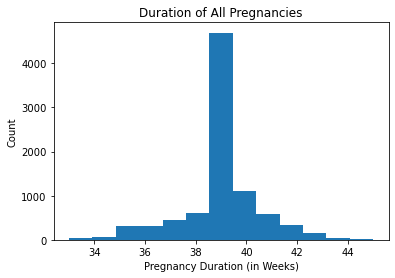

In [3]:
bins = [32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]

preglngth = pd.cut(preg['prglngth'], bins).value_counts().sort_index()

print(preglngth)

pregs = preg[preg['prglngth'] > 32]
pregs = pregs[pregs['prglngth'] < 46]


plt.hist(pregs['prglngth'], bins = 13,);
plt.xlabel("Pregnancy Duration (in Weeks)")
plt.ylabel("Count");
plt.title("Duration of All Pregnancies");


From this data, we can see that most pregnancies last between 38 and 40 weeks. Let's see if there is any difference between first born children vs other children

In [4]:
first_born = pregs[pregs['birthord'] == 1]
others = pregs[pregs['birthord'] != 1]

(32, 33]      28
(33, 34]      29
(34, 35]     159
(35, 36]     172
(36, 37]     208
(37, 38]     272
(38, 39]    2114
(39, 40]     536
(40, 41]     360
(41, 42]     205
(42, 43]      87
(43, 44]      23
(44, 45]       6
(45, 46]       0
Name: prglngth, dtype: int64


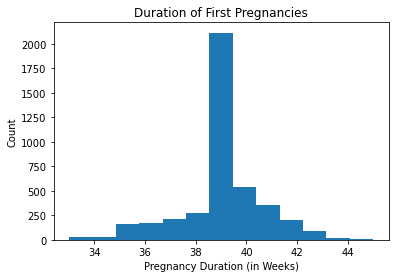

In [5]:
preglngth = pd.cut(first_born['prglngth'], bins).value_counts().sort_index()

print(preglngth)

plt.hist(first_born['prglngth'], bins = 13);
plt.xlabel("Pregnancy Duration (in Weeks)")
plt.ylabel("Count");
plt.title("Duration of First Pregnancies");

(32, 33]      21
(33, 34]      31
(34, 35]     152
(35, 36]     149
(36, 37]     247
(37, 38]     335
(38, 39]    2579
(39, 40]     580
(40, 41]     227
(41, 42]     123
(42, 43]      61
(43, 44]      23
(44, 45]       4
(45, 46]       0
Name: prglngth, dtype: int64


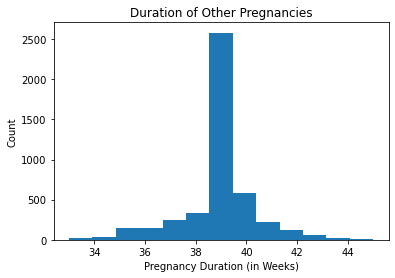

In [6]:
preglngth = pd.cut(others['prglngth'], bins).value_counts().sort_index()

print(preglngth)

plt.hist(others['prglngth'], bins = 13);
plt.xlabel("Pregnancy Duration (in Weeks)")
plt.ylabel("Count");
plt.title("Duration of Other Pregnancies");

`We can see that the data is almost identical from the graphics. But graphics can sometimes be misleading. Let's see what the averages look like. 

In [7]:
first_born_average = first_born['prglngth'].mean()
other_average = others['prglngth'].mean()
print("First-born children average: {:.3f}".format(first_born_average))
print("Other children  average: {:.3f}".format(other_average))
print("Difference: {:.3f}".format(first_born_average-other_average))
print("Difference (in hours): {:.3f}".format((first_born_average-other_average) * 168))

First-born children average: 39.052
Other children  average: 38.916
Difference: 0.135
Difference (in hours): 22.731


We can see from our data that there really isn't much of a difference between pregnancy durations between first children and other children based on these statistics. If you're still not satisfied, we can perform Cohen's d statistic, which is an even better way to analyze whether or not there is a statistical difference between two groups.

In [8]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [9]:
CohenEffectSize(first_born['prglngth'], others['prglngth'])

0.08193086412590274

The Cohen efficient we got is very small. To put it in perspective, a value of 0.2 would show a small significance, so there is almost no differences between the two groups.

We can say with reasonable confidence that there is no significant difference in pregnancy durations between first and non-first children. Hope that was enlightening!

Mike H.

## Exercise 2-4

#### Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier that others. Compute Cohen's d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [10]:
print(first_born["totalwgt_lb"].mean())
print(first_born["totalwgt_lb"].std())
print(first_born["totalwgt_lb"].var())

7.341619489279692
1.2294052393683446
1.5114372425863367


In [11]:
print(others["totalwgt_lb"].mean())
print(others["totalwgt_lb"].std())
print(others["totalwgt_lb"].var())

7.449589568907751
1.2314362751842967
1.5164352998397745


In [12]:
CohenEffectSize(first_born["totalwgt_lb"],others["totalwgt_lb"])

-0.08774774291002119

From this data, there is no strong proof that first born children weight more than subsequent children. The Cohen's d value for this statistic is almost identical to the statistic that compared pregnancy lengths, indicating that any data that may show some correlation is just caused by statistical noise.